#Import

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [ ]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv"
df_price = pd.read_csv(link)

#Exploration

In [ ]:
df_price

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000       NaN         4       2.50   
21610  1523300141  20140623T000000       NaN         2       0.75   
21611   291310100  20150116T000000       NaN         3       2.50   
21612  1523300157  20141015T000000       NaN         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [ ]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df_price.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.160900e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401174e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671546e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.215000e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [ ]:
# Colonne 'date' à passer en date pour l'exploiter et récupérer année et mois
df_price['date'] = pd.to_datetime(df_price['date'], format='%Y%m%dT%H%M%S')
df_price['year'] = df_price['date'].dt.year
df_price['month'] = df_price['date'].dt.month

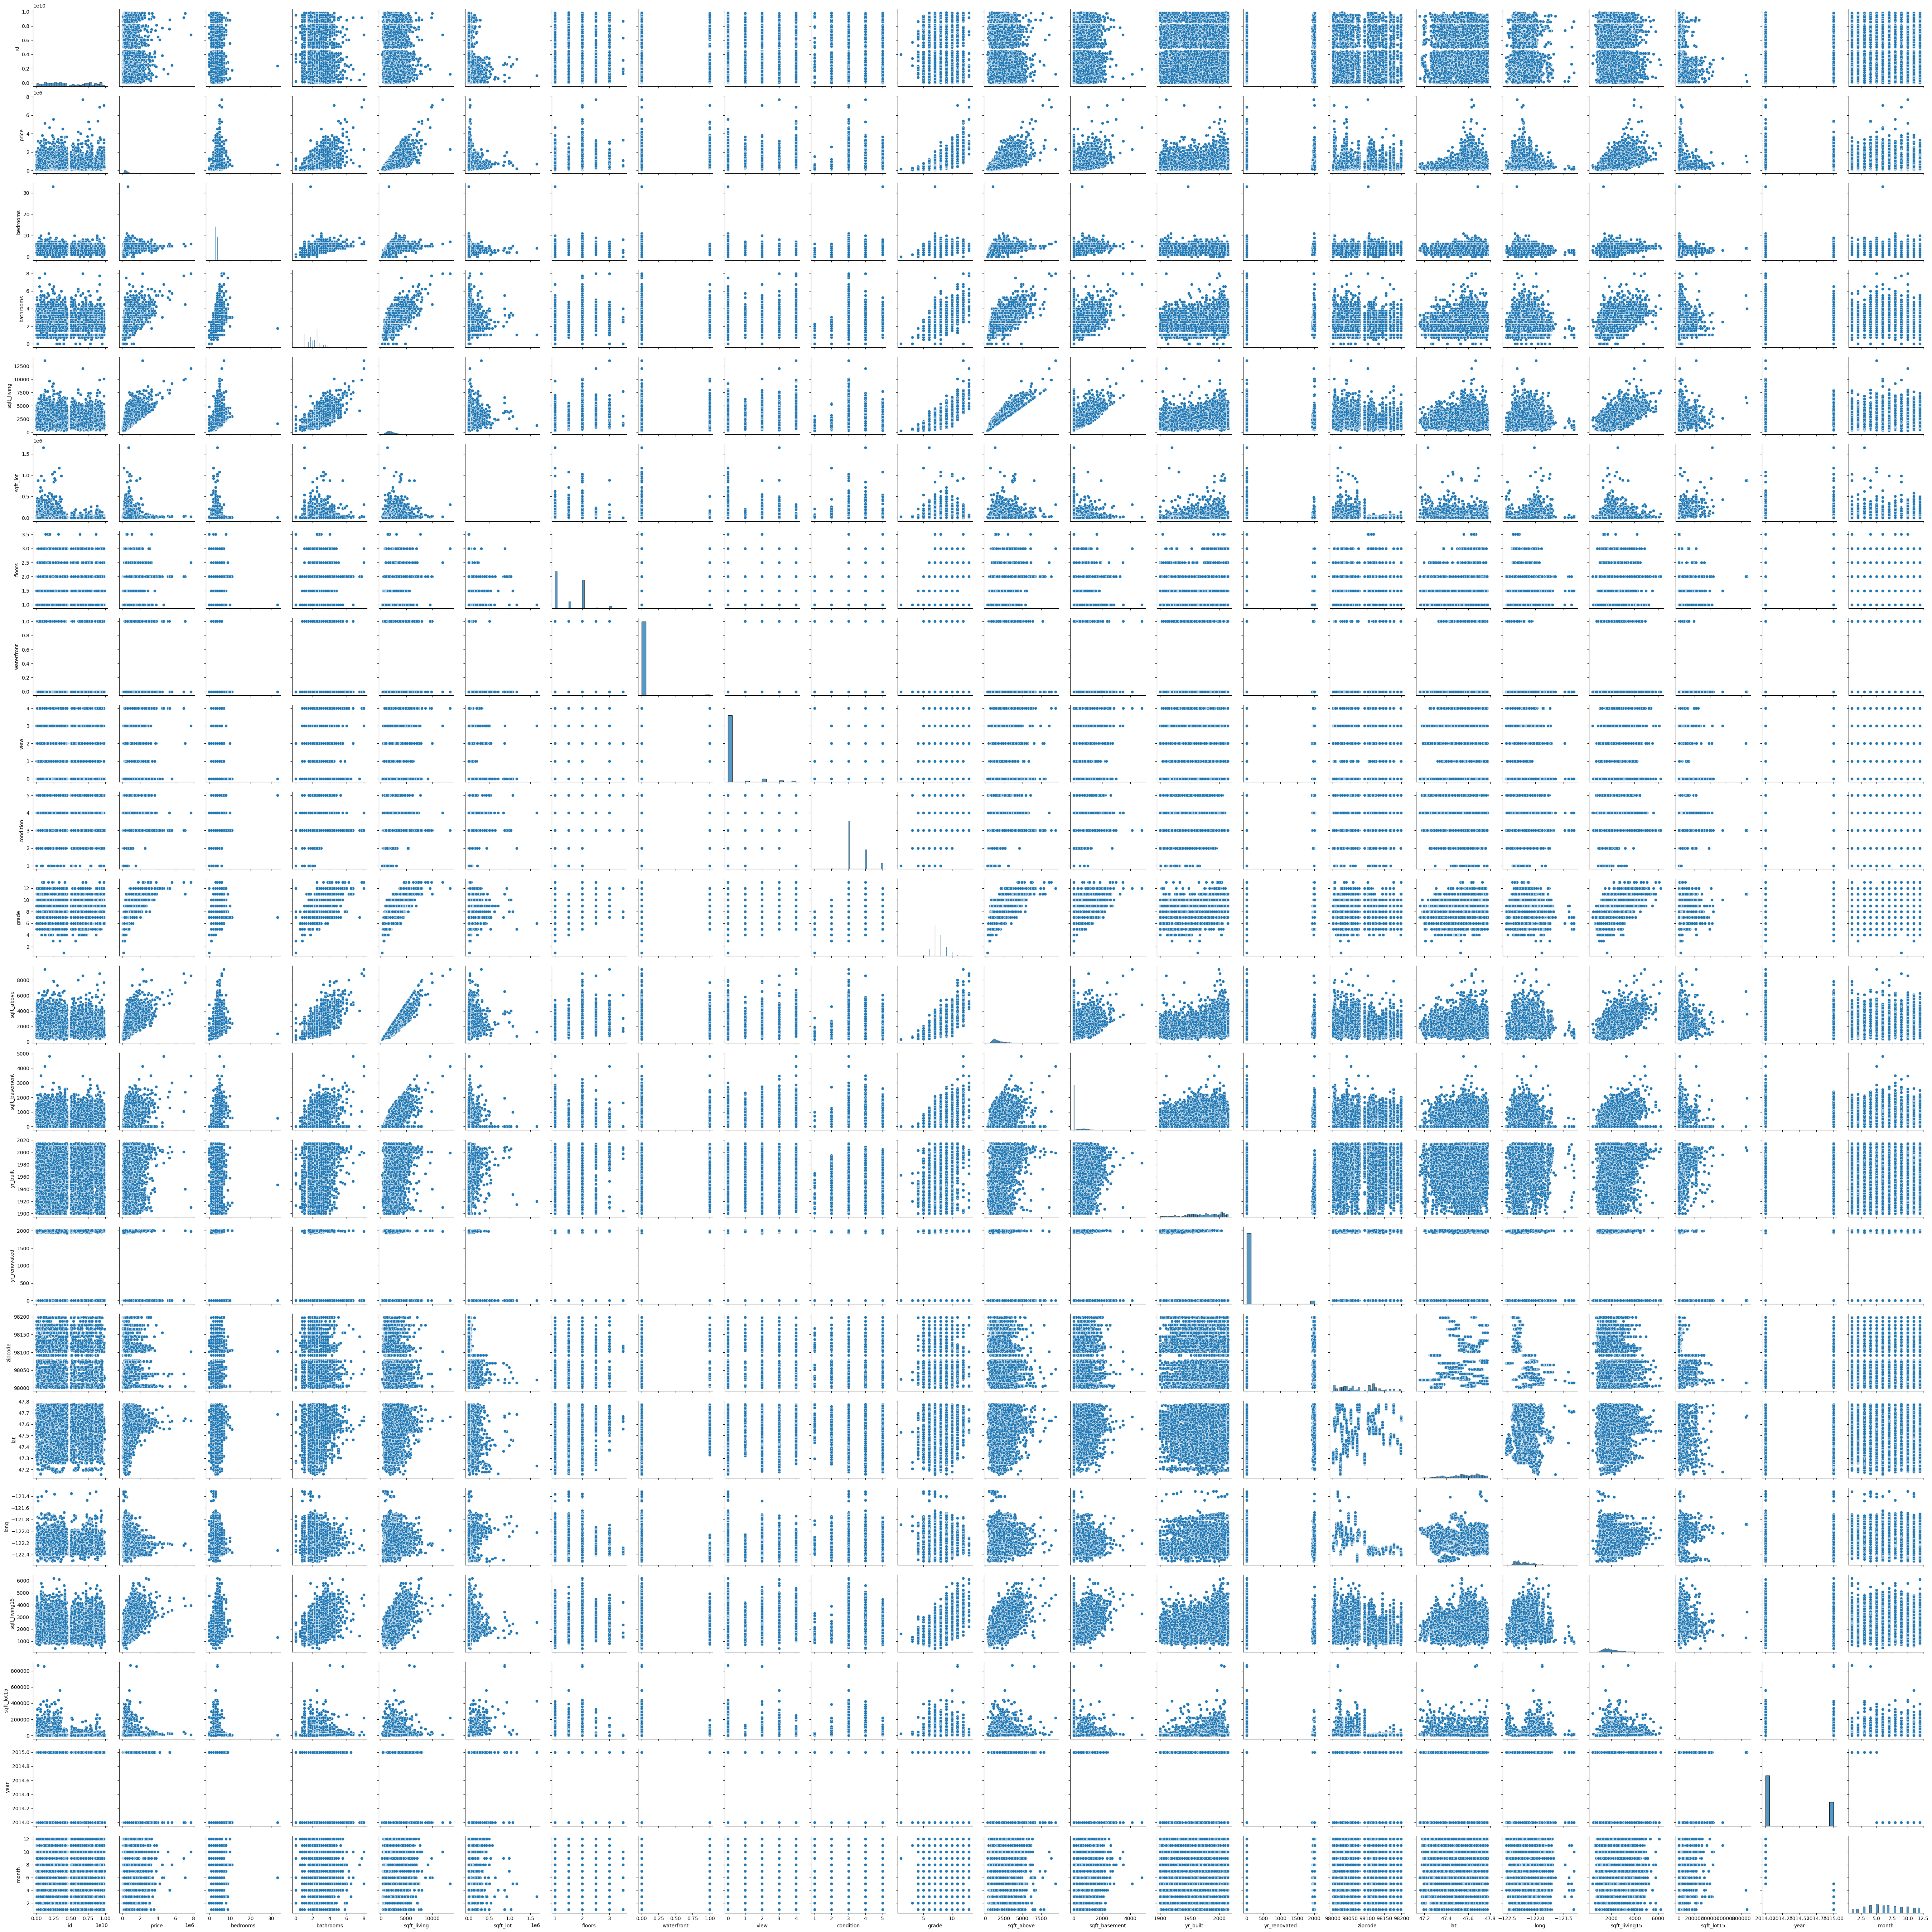

In [ ]:
sns.pairplot(df_price)


#Manipulation

In [ ]:
df = df_price.dropna()

In [ ]:
df_price['predict_price'] = df_price['price']

##Test statistique

In [ ]:
for i in df.columns:
  if i != 'price' and pd.api.types.is_numeric_dtype(df[i]):
    correlation = df[i].corr(df['price'])
    t_stat, p_value = stats.ttest_ind(df[i], df['price'])
    print(f'Corrélation entre {i} et price: {correlation} et la probabilité critique: {p_value}')

Corrélation entre id et price: -0.01682566522662582 et la probabilité critique: 0.0
Corrélation entre bedrooms et price: 0.3083298331339738 et la probabilité critique: 0.0
Corrélation entre bathrooms et price: 0.5251681240011306 et la probabilité critique: 0.0
Corrélation entre sqft_living et price: 0.7020402114641038 et la probabilité critique: 0.0
Corrélation entre sqft_lot et price: 0.08963888978642197 et la probabilité critique: 0.0
Corrélation entre floors et price: 0.2568941082088875 et la probabilité critique: 0.0
Corrélation entre waterfront et price: 0.26636744410408236 et la probabilité critique: 0.0
Corrélation entre view et price: 0.39727964985197683 et la probabilité critique: 0.0
Corrélation entre condition et price: 0.036313547075541235 et la probabilité critique: 0.0
Corrélation entre grade et price: 0.6674439508556651 et la probabilité critique: 0.0
Corrélation entre sqft_above et price: 0.6055743872836554 et la probabilité critique: 0.0
Corrélation entre sqft_basement

<Axes: >

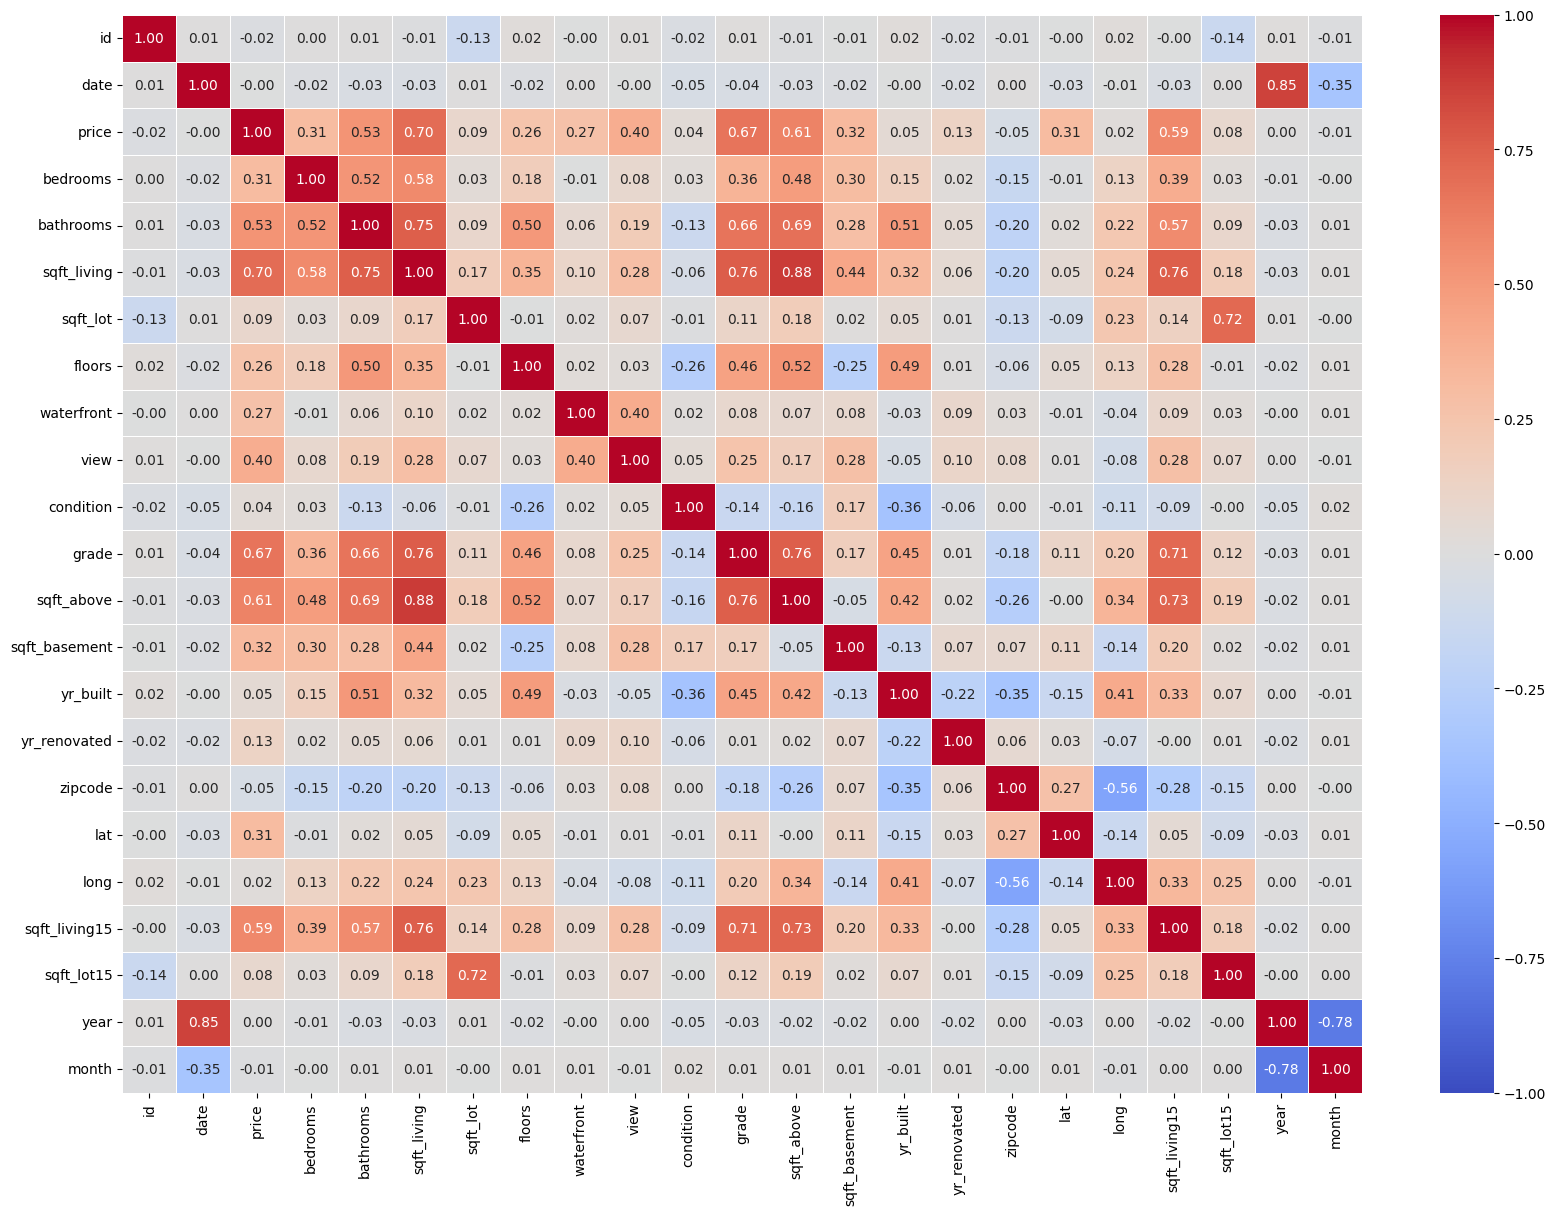

In [ ]:
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

##Modèle initial

In [ ]:
x = []
for i in df.columns:
  if i != 'price' and i != 'id' and i != 'date':
    x.append(i)
x

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'year',
 'month']

In [ ]:
X = df[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month']]
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

model_ini2 = LinearRegression().fit(X_train, y_train)

print("Score for the Train dataset :", model_ini2.score(X_train, y_train))
print("Score for the Test dataset :", model_ini2.score(X_test, y_test))

Score for the Train dataset : 0.702807039372867
Score for the Test dataset : 0.6961731244953994


##Modèle initial 2

In [ ]:
y = df[['price']]
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

model_ini = LinearRegression().fit(X_train, y_train)

print("Score for the Train dataset :", model_ini.score(X_train, y_train))
print("Score for the Test dataset :", model_ini.score(X_test, y_test))

Score for the Train dataset : 0.6414239385182889
Score for the Test dataset : 0.6387958654589796


##Modèle logarithmique


In [ ]:
x = []
for i in df_ln.columns:
  if i != 'price' and i != 'id' and i != 'date':
    x.append(i)
x

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'sqft_living15',
 'sqft_lot15',
 'year',
 'month']

In [ ]:
X = df_ln[x]
y = df_ln[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

model_ln2 = LinearRegression().fit(X_train, y_train)

print("Score for the Train dataset :", model_ln2.score(X_train, y_train))
print("Score for the Test dataset :", model_ln2.score(X_test, y_test))

Score for the Train dataset : 0.7661013331375169
Score for the Test dataset : 0.7721783285944251


In [ ]:
coef_dict = dict(zip(X.columns, model_ln2.coef_[0]))
coef_dict['Intercept'] = model_ln2.intercept_[0]
coef_dict

{'bedrooms': -0.06064801376759014,
 'bathrooms': 0.03978696466570189,
 'sqft_living': 0.15319339942532367,
 'floors': 0.014547625231163283,
 'view': 0.09700711469131296,
 'grade': 0.04678178795458342,
 'sqft_above': 0.014121180429742376,
 'sqft_basement': 0.20091725927053125,
 'lat': 1.2573841477757717,
 'sqft_living15': 0.21460928124533032,
 'Intercept': 259.3309761555861}

##Modèle logarithmique 2

In [ ]:
df_ln = df.copy()
df_ln = df_ln.drop(columns=['long'])
df_ln = df_ln.apply(lambda x: np.log(x + 1e-5) if x.dtype in ['float64', 'int64'] else x)
df_ln

id       date      price  bedrooms  bathrooms  sqft_living  \
0      22.687479 2014-10-13  12.309982  1.098616   0.000010     7.073270   
1      22.581765 2014-12-09  13.195614  1.098616   0.810935     7.851661   
2      22.451642 2015-02-25  12.100712  0.693152   0.000010     6.646391   
3      21.634424 2014-12-09  13.311329  1.386297   1.098616     7.580700   
4      21.393349 2015-02-18  13.142166  1.098616   0.693152     7.426549   
...          ...        ...        ...       ...        ...          ...   
21604  23.009132 2015-01-26  12.969212  1.098616   0.693152     7.306531   
21605  21.961321 2014-10-14  13.322337  1.386297   0.916295     7.832014   
21606  22.794675 2015-03-26  13.822983  1.386297   1.252766     8.163371   
21607  21.821145 2015-02-19  13.071070  1.098616   0.916295     7.177782   
21608  19.387665 2014-05-21  12.793859  1.098616   0.916295     7.333023   

       sqft_lot    floors  waterfront       view  ...  sqft_above  \
0      8.639411  0.000010  -11.512925 -11.512925  ...    7.073270   
1      8.887653  0.693152  -11.512925 -11.512925  ...    7.682482   
2      9.210340  0.000010  -11.512925 -11.512925  ...    6.646391   
3      8.517193  0.000010  -11.512925 -11.512925  ...    6.956545   
4      8.997147  0.000010  -11.512925 -11.512925  ...    7.426549   
...         ...       ...         ...        ...  ...         ...   
21604  7.026427  1.098616  -11.512925 -11.512925  ...    7.306531   
21605  8.703341  0.693152  -11.512925 -11.512925  ...    7.832014   
21606  8.881836  0.693152  -11.512925 -11.512925  ...    7.863267   
21607  7.165493  0.693152  -11.512925 -11.512925  ...    7.073270   
21608  7.030857  1.098616  -11.512925 -11.512925  ...    7.333023   

       sqft_basement  yr_built  yr_renovated    zipcode       lat  \
0         -11.512925  7.578145    -11.512925  11.494537  3.860966   
1           5.991465  7.576097      7.596392  11.493997  3.865372   
2         -11.512925  7.566828    -11.512925  11.493008  3.865726   
3           6.813445  7.583248    -11.512925  11.494110  3.861168   
4         -11.512925  7.594381    -11.512925  11.493478  3.863186   
...              ...       ...           ...        ...       ...   
21604     -11.512925  7.607878    -11.512925  11.494191  3.862200   
21605     -11.512925  7.607878    -11.512925  11.493294  3.861018   
21606       6.813445  7.605392    -11.512925  11.494110  3.861860   
21607       4.867535  7.604894    -11.512925  11.493906  3.862356   
21608     -11.512925  7.605392    -11.512925  11.493773  3.864917   

       sqft_living15  sqft_lot15  year  month  
0           7.200425    8.639411  2014     10  
1           7.432484    8.941022  2014     12  
2           7.908387    8.994917  2015      2  
3           7.215240    8.517193  2014     12  
4           7.495542    8.923058  2015      2  
...              ...         ...   ...    ...  
21604       7.244228    7.114769  2015      1  
21605       7.832014    8.703341  2014     10  
21606       7.625595    8.732305  2015      3  
21607       7.192934    7.142827  2015      2  
21608       7.333023    7.319202  2014      5  

[21609 rows x 22 columns]

In [ ]:
y = df_ln[['price']]
X = df_ln[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

model_ln = LinearRegression().fit(X_train, y_train)

print("Score for the Train dataset :", model_ln.score(X_train, y_train))
print("Score for the Test dataset :", model_ln.score(X_test, y_test))

Score for the Train dataset : 0.7203198945092424
Score for the Test dataset : 0.7228757662916852


##Prévision avce meilleur modèle (ln)

In [ ]:
df_ln_price = df_price.copy()
df_ln_price = df_ln_price.drop(columns=['long'])
df_ln_price = df_ln_price.apply(lambda x: np.log(x + 1e-5) if x.dtype in ['float64', 'int64'] else x)
df_ln_price

id       date      price  bedrooms  bathrooms  sqft_living  \
0      22.687479 2014-10-13  12.309982  1.098616   0.000010     7.073270   
1      22.581765 2014-12-09  13.195614  1.098616   0.810935     7.851661   
2      22.451642 2015-02-25  12.100712  0.693152   0.000010     6.646391   
3      21.634424 2014-12-09  13.311329  1.386297   1.098616     7.580700   
4      21.393349 2015-02-18  13.142166  1.098616   0.693152     7.426549   
...          ...        ...        ...       ...        ...          ...   
21608  19.387665 2014-05-21  12.793859  1.098616   0.916295     7.333023   
21609  22.610345 2015-02-23        NaN  1.386297   0.916295     7.745003   
21610  21.144145 2014-06-23        NaN  0.693152  -0.287669     6.927558   
21611  19.489899 2015-01-16        NaN  1.098616   0.916295     7.377759   
21612  21.144145 2014-10-15        NaN  0.693152  -0.287669     6.927558   

       sqft_lot    floors  waterfront       view  ...  sqft_above  \
0      8.639411  0.000010  -11.512925 -11.512925  ...    7.073270   
1      8.887653  0.693152  -11.512925 -11.512925  ...    7.682482   
2      9.210340  0.000010  -11.512925 -11.512925  ...    6.646391   
3      8.517193  0.000010  -11.512925 -11.512925  ...    6.956545   
4      8.997147  0.000010  -11.512925 -11.512925  ...    7.426549   
...         ...       ...         ...        ...  ...         ...   
21608  7.030857  1.098616  -11.512925 -11.512925  ...    7.333023   
21609  8.667852  0.693152  -11.512925 -11.512925  ...    7.745003   
21610  7.207860  0.693152  -11.512925 -11.512925  ...    6.927558   
21611  7.778211  0.693152  -11.512925 -11.512925  ...    7.377759   
21612  6.981006  0.693152  -11.512925 -11.512925  ...    6.927558   

       sqft_basement  yr_built  yr_renovated    zipcode       lat  \
0         -11.512925  7.578145    -11.512925  11.494537  3.860966   
1           5.991465  7.576097      7.596392  11.493997  3.865372   
2         -11.512925  7.566828    -11.512925  11.493008  3.865726   
3           6.813445  7.583248    -11.512925  11.494110  3.861168   
4         -11.512925  7.594381    -11.512925  11.493478  3.863186   
...              ...       ...           ...        ...       ...   
21608     -11.512925  7.605392    -11.512925  11.493773  3.864917   
21609     -11.512925  7.607878    -11.512925  11.494211  3.860955   
21610     -11.512925  7.605392    -11.512925  11.494191  3.862715   
21611     -11.512925  7.602900    -11.512925  11.492998  3.861456   
21612     -11.512925  7.604894    -11.512925  11.494191  3.862709   

       sqft_living15  sqft_lot15  year  month  
0           7.200425    8.639411  2014     10  
1           7.432484    8.941022  2014     12  
2           7.908387    8.994917  2015      2  
3           7.215240    8.517193  2014     12  
4           7.495542    8.923058  2015      2  
...              ...         ...   ...    ...  
21608       7.333023    7.319202  2014      5  
21609       7.512071    8.881836  2015      2  
21610       6.927558    7.604396  2014      6  
21611       7.251345    7.160069  2015      1  
21612       6.927558    7.213032  2014     10  

[21613 rows x 22 columns]

In [ ]:
missing_data = df_ln_price[df_ln_price['price'].isnull()]
X_missing = missing_data.drop(columns=['price', 'date', 'id' ])
predicted_prices = model_ln2.predict(X_missing)
df_ln_price.loc[df_ln_price['price'].isnull(), 'price'] = predicted_prices

ValueError: Found array with 0 sample(s) (shape=(0, 19)) while a minimum of 1 is required by LinearRegression.

In [ ]:
df_f = df_ln_price.apply(lambda x: np.exp(x) - 1e-5 if x.dtype in ['float64', 'int64'] else x)
df_f['long'] = df_price['long']

In [ ]:
df_f

id       date          price  bedrooms  bathrooms  \
0      7.129301e+09 2014-10-13  221900.000000       3.0       1.00   
1      6.414100e+09 2014-12-09  538000.000000       3.0       2.25   
2      5.631500e+09 2015-02-25  180000.000000       2.0       1.00   
3      2.487201e+09 2014-12-09  604000.000000       4.0       3.00   
4      1.954401e+09 2015-02-18  510000.000000       3.0       2.00   
...             ...        ...            ...       ...        ...   
21608  2.630000e+08 2014-05-21  360000.000000       3.0       2.50   
21609  6.600060e+09 2015-02-23  412992.647072       4.0       2.50   
21610  1.523300e+09 2014-06-23  250812.872028       2.0       0.75   
21611  2.913101e+08 2015-01-16  414137.416475       3.0       2.50   
21612  1.523300e+09 2014-10-15  256727.935434       2.0       0.75   

       sqft_living  sqft_lot  floors    waterfront          view  ...  \
0           1180.0    5650.0     1.0 -3.388132e-21 -3.388132e-21  ...   
1           2570.0    7242.0     2.0 -3.388132e-21 -3.388132e-21  ...   
2            770.0   10000.0     1.0 -3.388132e-21 -3.388132e-21  ...   
3           1960.0    5000.0     1.0 -3.388132e-21 -3.388132e-21  ...   
4           1680.0    8080.0     1.0 -3.388132e-21 -3.388132e-21  ...   
...            ...       ...     ...           ...           ...  ...   
21608       1530.0    1131.0     3.0 -3.388132e-21 -3.388132e-21  ...   
21609       2310.0    5813.0     2.0 -3.388132e-21 -3.388132e-21  ...   
21610       1020.0    1350.0     2.0 -3.388132e-21 -3.388132e-21  ...   
21611       1600.0    2388.0     2.0 -3.388132e-21 -3.388132e-21  ...   
21612       1020.0    1076.0     2.0 -3.388132e-21 -3.388132e-21  ...   

       sqft_basement  yr_built  yr_renovated  zipcode      lat  sqft_living15  \
0      -3.388132e-21    1955.0 -3.388132e-21  98178.0  47.5112         1340.0   
1       4.000000e+02    1951.0  1.991000e+03  98125.0  47.7210         1690.0   
2      -3.388132e-21    1933.0 -3.388132e-21  98028.0  47.7379         2720.0   
3       9.100000e+02    1965.0 -3.388132e-21  98136.0  47.5208         1360.0   
4      -3.388132e-21    1987.0 -3.388132e-21  98074.0  47.6168         1800.0   
...              ...       ...           ...      ...      ...            ...   
21608  -3.388132e-21    2009.0 -3.388132e-21  98103.0  47.6993         1530.0   
21609  -3.388132e-21    2014.0 -3.388132e-21  98146.0  47.5107         1830.0   
21610  -3.388132e-21    2009.0 -3.388132e-21  98144.0  47.5944         1020.0   
21611  -3.388132e-21    2004.0 -3.388132e-21  98027.0  47.5345         1410.0   
21612  -3.388132e-21    2008.0 -3.388132e-21  98144.0  47.5941         1020.0   

       sqft_lot15  year  month     long  
0          5650.0  2014     10 -122.257  
1          7639.0  2014     12 -122.319  
2          8062.0  2015      2 -122.233  
3          5000.0  2014     12 -122.393  
4          7503.0  2015      2 -122.045  
...           ...   ...    ...      ...  
21608      1509.0  2014      5 -122.346  
21609      7200.0  2015      2 -122.362  
21610      2007.0  2014      6 -122.299  
21611      1287.0  2015      1 -122.069  
21612      1357.0  2014     10 -122.299  

[21613 rows x 23 columns]

DataFrame beaucoup modifier du à l'application du ln puis exposant

In [ ]:
missing_data = df_ln_price[df_ln_price['price'].isnull()]
X_missing = missing_data.drop(columns=['price', 'date', 'id' ])
predicted_prices = model_ln2.predict(X_missing)
predicted_prices

array([[12.93118507],
       [12.43246241],
       [12.93395312],
       [12.45577219]])

In [ ]:
prediction = np.exp(predicted_prices)
prediction

array([[412992.64708241],
       [250812.87203807],
       [414137.41648499],
       [256727.93544396]])

In [ ]:
df_price.loc[df_price['predict_price'].isnull(), 'predict_price'] = prediction


In [ ]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Remplissage du DF beaucoup plus propre

#Graphique

<Axes: xlabel='date', ylabel='predict_price'>

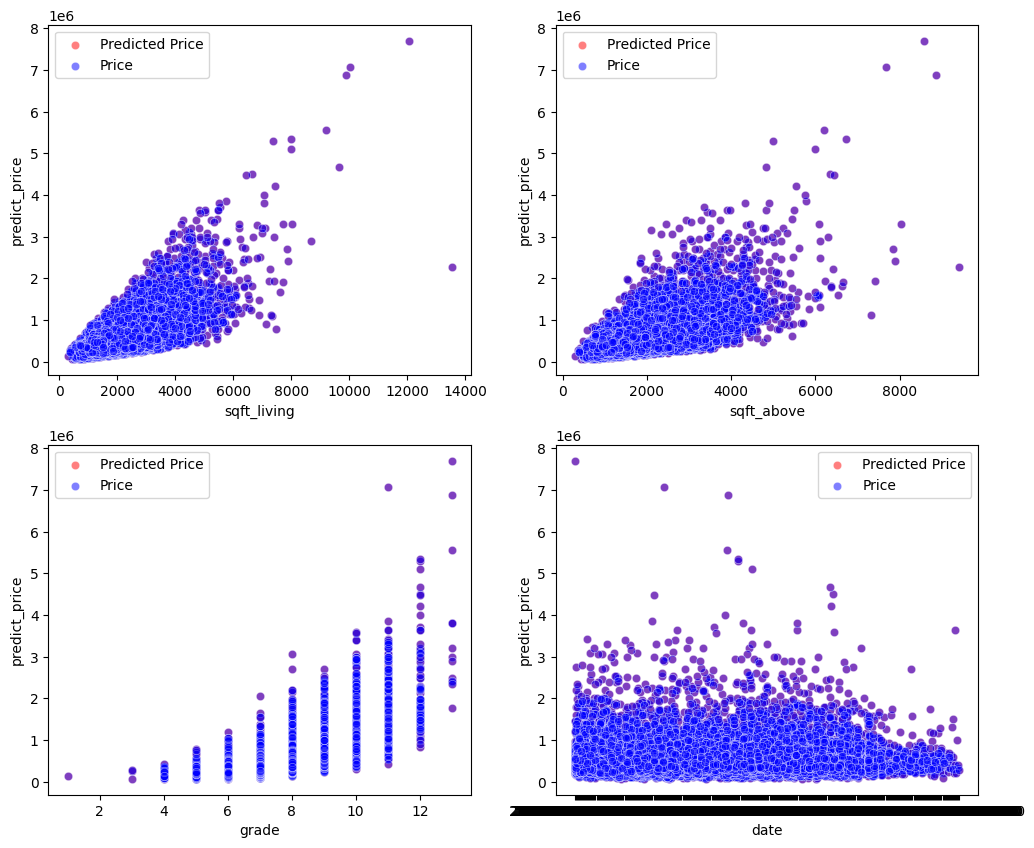

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x='sqft_living', y='predict_price', data=df_price, ax=axs[0, 0], color='red', label='Predicted Price', alpha=0.5)
sns.scatterplot(x='sqft_living', y='price', data=df_price, ax=axs[0, 0], color='blue', label='Price', alpha=0.5)

sns.scatterplot(x='sqft_above', y='predict_price', data=df_price, ax=axs[0, 1], color='red', label='Predicted Price', alpha=0.5)
sns.scatterplot(x='sqft_above', y='price', data=df_price, ax=axs[0, 1], color='blue', label='Price', alpha=0.5)

sns.scatterplot(x='grade', y='predict_price', data=df_price, ax=axs[1, 0], color='red', label='Predicted Price', alpha=0.5)
sns.scatterplot(x='grade', y='price', data=df_price, ax=axs[1, 0], color='blue', label='Price', alpha=0.5)

sns.scatterplot(x='date', y='predict_price', data=df_price, ax=axs[1, 1], color='red', label='Predicted Price', alpha=0.5)
sns.scatterplot(x='date', y='price', data=df_price, ax=axs[1, 1], color='blue', label='Price', alpha=0.5)